In [5]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [59]:
df_us = df[(df['job_country']=='United States')].copy()
df_exploded = df_us.explode('job_skills').copy()

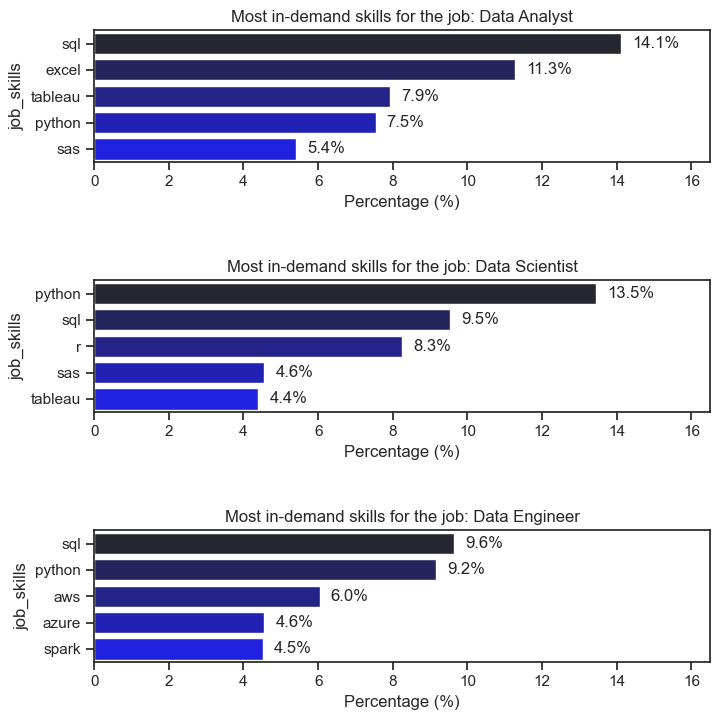

In [ ]:
# Step 1: Select the top 3 most popular job titles
top_jobs = df_us['job_title_short'].value_counts().head(3).index

# Configure the figure to display 3 plots stacked vertically
plt.figure(figsize=(8, 8))

sns.set_theme(style='ticks')

# Loop to create a plot for each job
for i, job in enumerate(top_jobs, 1):
    # Filter the skills for the current job
    job_df = df_us[df_us['job_title_short'] == job]
    job_skills = job_df['job_skills'].explode()
    
    # Count the skills
    skills_count = job_skills.value_counts()
    
    # Calculate percentages manually
    total_skills = skills_count.sum()  # Total number of skills
    skills_percentage = (skills_count / total_skills) * 100  # Calculate percentage
    # Get the top 5 skills
    most_common_skills = skills_percentage.head(5)
    
    # Create a subplot for the current job
    plt.subplot(3, 1, i)
    ax = sns.barplot(x=most_common_skills.values, y=most_common_skills.index, hue=most_common_skills.index, palette='dark:blue', legend=False)
    plt.xlabel('Percentage (%)')
    plt.title(f'Most in-demand skills for the job: {job}')
    
    # Set x-axis limit
    plt.xlim(0, 16.5)
    
    # Add percentages next to the bars
    for index, value in enumerate(most_common_skills.values):
        ax.text(value + 0.3, index, f"{value:.1f}%", va='center')
    
    plt.tight_layout(pad=3)

plt.show()
